# 线性回归
## 任务1. 一元线性回归
### 任务介绍：
- 自定义一元回归函数MyLinearRegression()，输入参数为x和y的数组xArr和yArr，输出为参数w1和w0，利用最小二乘法求得参数;
- 使用美国医疗保险费数据insurance.csv中的输入特征age和目标特征charges，输入MyLinearRegression()函数，得到回归参数值w1和w0，并保留到小数点后两位;
- 调用sklearn的LinearRegression()函数，比较其运行结果与上述自定义函数MyLinearRegression()的输出结果是否一致。
- 利用age与charges绘制真实样本点，利用w1与w0计算预测值，再绘制age与预测值的点图，观察真实样本点与预测点之间的拟合程度。

> 补全代码

模型训练，得到参数值
257.72 
 3165.89
sklearn的训练结果
257.72
3165.89


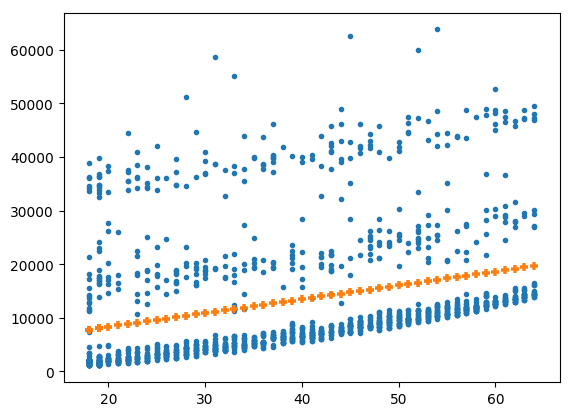

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

insurance = pd.read_csv('insurance.csv')
age = insurance['age'].values
charges = insurance['charges'].values

# 请在下方作答
# 定义一元线性回归函数
def MyLinearRegression(xArr, yArr):
    
    # x均值, y均值计算
    mean_x = xArr.mean()
    mean_y = yArr.mean()
    #print(mean_x)
    #print(xArr)
    #print(xArr-mean_x)
    # w0, w1计算
    w1 = (np.mean(np.multiply(xArr,yArr))-mean_x*mean_y)/(np.square(xArr).mean()-np.square(mean_x))
    #计算公式有点长 multiply的用法
    w0 = mean_y - w1*mean_x
   
    return round(w0,2), round(w1,2)
    
print("模型训练，得到参数值")
w0, w1 = MyLinearRegression(age,charges)
print(w1,'\n', w0)

print("sklearn的训练结果")
lr = LinearRegression()
#线性回归模型训练
lr.fit(age.reshape(-1, 1),charges.reshape(-1, 1))
print(round(lr.coef_[0,0],2))
print(round(lr.intercept_[0],2))
#w3=round(lr.coef_[0,0],2)
#w4=round(lr.intercept_[0],2)
# 观察真实样本点与预测点之间的拟合程度
plt.scatter(age, charges, marker='.')  # 画样本点，随机散点
# 利用w1与w0计算预测值，绘制预测点
plt.scatter(age, w1*age+w0, marker='+')  # 画预测点，形成直线
plt.show()

# 请直接运行处结果，然后提交作业，该运行结果会自动一同提交上去

## 任务2. 多元线性回归
### 任务介绍：
- 自定义多元线性回归函数MyLinearRegression2()，输入参数为X和y的数组xArr和yArr，输出为参数ws，利用最小二乘法求得参数;
- 使用美国医疗保险费数据insurance.csv中的输入特征age、bmi和children，目标特征charges，根据MyLinearRegression2()函数，得到回归参数值ws；注意判断（X^T X）^{-1}是否为满秩，如果满秩，则引入正则项，参数为alpha，目标函数变为岭回归问题。
- 为了得到模型的截距，需要在矩阵X最后增加一列，并且该列所有行的值均为1。
- 调用sklearn的LinearRegression()函数，比较其运行结果与上述自定义函数MyLinearRegression2()的输出结果是否一致。

In [55]:
from sklearn.linear_model import LinearRegression
from numpy import mat, linalg, column_stack, ones
import pandas as pd
insurance = pd.read_csv('insurance.csv')

# 请在下方作答 #
# 定义多元线性回归函数
def MyLinearRegression2(xArr, yArr):
    
    # 调用mat将Array转换为矩阵
    xMat = mat(xArr)
    yMat = mat(yArr)
    xTx = xMat.T*xMat
    # 通过调用linalg计算行列式来判定协方差矩阵是否可逆
    if linalg.det(xTx)==0:
        print( "singular matrix, can't do inverse")
        # 引入正则项，即 岭回归
        alpha = 0.1
        xTx = xTx+alpha*identity(xTx.shape[0])

    # 计算参数向量
    
    '''print(xTx.I.shape)
    print(xMat.T.shape)'''
    #print(yMat.shape)
    ws = xTx.I*xMat.T*yMat.T #最后ymat转置了，不然点乘不了？
    
    return ws

# 模型训练，得到参数值
X = insurance[['age', 'bmi', 'children']].values
# 调用column_stack函数在矩阵X后增加一列，并且该列所有行的值均为1
X = column_stack((X,ones((X.shape[0],1)))) #括号个数
y = insurance['charges']
ws = MyLinearRegression2(X,y)
#print(ws)
# sklearn的训练结果
lr = LinearRegression()
#线性回归模型训练
lr.fit(X,y)
print("sklearn的训练结果")
print(lr.coef_)
print(lr.intercept_)

# 请直接运行处结果，然后提交作业，该运行结果会自动一同提交上去

[[  239.99447429]
 [  332.0833645 ]
 [  542.86465225]
 [-6916.24334779]]
sklearn的训练结果
[239.99447429 332.0833645  542.86465225   0.        ]
-6916.243347787033


## 任务3. 线性回归应用：预测医疗费用
### 任务介绍
- 对insurance.csv中的名义型特征进行One-Hot编码，得到了数据变量insurance
- 请使用自定义的多元回归函数MyLinearRegression2()得到回归模型参数ws和预测值y_pred，并计算R2分数
- 比较使用sklearn进行模型训练和模型评价R2分数的结果

复用上一节实验中实现的代码，可以复制粘贴代替下面的代码

(1338, 12)


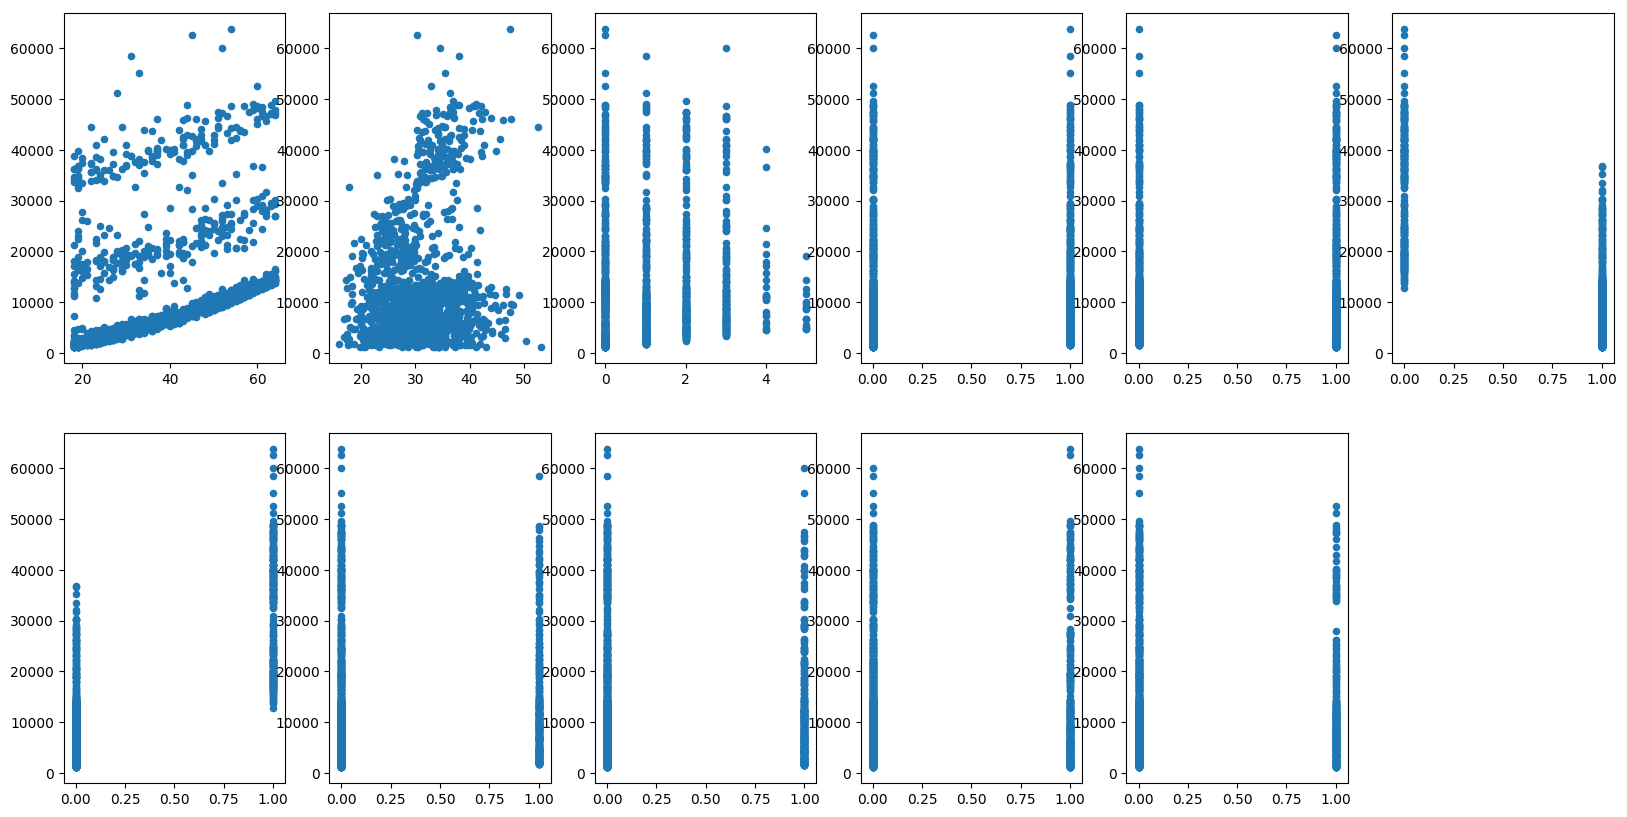

0.7509130345985207


In [58]:
from sklearn import linear_model, metrics
from numpy import mat, array, mean
from pandas import get_dummies,read_csv
import matplotlib.pyplot as plt

# 调用get_dummies函数对非数值型特征进行 one-hot 编码处理，以便于运算
insurance = get_dummies(read_csv('insurance.csv'))#注意引号
print(insurance.shape)

# 从insurance中获取X与y
X = insurance.drop(['charges'], axis=1)
y = insurance['charges']

# 对每个特征与y的关系进行可视化，观察与y的相关性
plt.figure(figsize=(20,10))
for i in range(11):
    plt.subplot(2,6,i+1)
    plt.scatter(array(X)[:,i],y,s=20)
plt.show()

# 根据X、y和自定义函数MyLinearRegression2()训练模型参数ws，并计算X的预测值y_pred
ws = MyLinearRegression2(X,y)
#print(ws)
#print(X.type) x为dataframe,而ws为matrix
y_pred = mat(X)*ws
y_pred = array(y_pred).reshape(y_pred.shape[0],) # 将矩阵转换为一行多列的array格式

# 调用metrics中的r2_score函数根据y和y_pred计算决定系数score
score = metrics.r2_score(y,y_pred)
#print(score) score有点不对劲
# sklearn模型训练与预测
lr = linear_model.LinearRegression(fit_intercept=False)
# 模型训练
lr.fit(X,y)
# 计算X的预测值y_pred_sk与R2分数score_sk
y_pred_sk = lr.predict(X)
score_sk = metrics.r2_score(y,y_pred_sk)
print(score_sk)

# 请直接运行处结果，然后提交作业，该运行结果会自动一同提交上去